In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# Returns Dataframe of company: (index) Date, Open, High, Low, Close, Volume, Dividends, Stock Splits
def getStockHistory(stockName, timeDiffInYears=1):
  tickerInstance = yf.Ticker(stockName)
  end_date = datetime.now().strftime('%Y-%m-%d')
  start_date = ( datetime.now() - timedelta(days= 365.24 * timeDiffInYears) ).strftime('%Y-%m-%d')
  history = tickerInstance.history(start = start_date, end = end_date)
  return history

# Returns Series(?)
def stockHistoryToDailyPrice(history):
  daily_prices = history['Open']
  return daily_prices

def stockHistoryToDailyVolume(history):
  daily_volumes = history['Volume']
  return daily_volumes[1:]

# Return Series with daily price return values, date as index
def dailyPriceToDailyPriceReturn(daily_price):
  dates = daily_price[1:].index
  temp = daily_price[1:].reset_index()['Open'] / daily_price[:-1].reset_index()['Open']
  temp = temp.apply(np.log)
  daily_price_return = pd.DataFrame({'Price Return': temp.values}, index=dates)
  return daily_price_return['Price Return'] # Remove column selection to get dataframe instead of series

def cross_correlation(timeSeries1, timeSeries2):
  xi_, xj_ = timeSeries1.mean(), timeSeries2.mean()
  len = timeSeries1.size
  numerator, denominator1, denominator2 = 0, 0, 0
  for t in range(len):
    xi, xj = timeSeries1.iloc[t], timeSeries2.iloc[t]
    numerator += (xi - xi_) * (xj - xj_)
    denominator1 += (xi - xi_) ** 2
    denominator2 += (xj - xj_) ** 2
  c = numerator / ( (denominator1 ** 0.5) * (denominator2 ** 0.5) )
  return c


In [ ]:
# Example code, no need to run
history = getStockHistory(stockName = 'TSLA')
h2 = getStockHistory(stockName = 'TSLA')
dp = stockHistoryToDailyPrice(history)
dp2 = stockHistoryToDailyPrice(h2)
dpr1 = dailyPriceToDailyPriceReturn(dp)
dpr2 = dailyPriceToDailyPriceReturn(dp2)
cross_correlation(dp, dp2)

1.0

In [ ]:
import itertools

# 15 most popularly traded stocks
stockNames = 'TSLA NVDA MSFT AAPL AMZN AMD GOOGL META GOOG PLTR BA NFLX COIN PYPL BABA'.split(' ')
stockHistories = {}

for stockName in stockNames:
  stockHistories[stockName] = getStockHistory(stockName)

correlationTable = pd.DataFrame(0.0, index = stockNames, columns=stockNames)

for pair in itertools.product(stockNames, repeat=2):
  s1, s2 = pair
  stock1_dailyClosePrice, stock2_dailyClosePrice = stockHistories[s1]['Close'], stockHistories[s2]['Close']
  # stock1_dailyVolume, stock2_dailyVolume = stockHistories[s1]['Volume'], stockHistories[s2]['Volume']
  # stock1_dailyPriceReturn, stock2_dailyPriceReturn = dailyPriceToDailyPriceReturn(stock1_dailyClosePrice), dailyPriceToDailyPriceReturn(stock2_dailyClosePrice)
  correlationTable[s1][s2] = cross_correlation(stock1_dailyClosePrice, stock2_dailyClosePrice)
correlationTable

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.000000,0.457344,0.750620,0.847412,0.899805,0.675799,0.819999,0.716237,0.821470,0.784874,-0.215679,-0.051391,0.718370,0.767337,0.105457
NVDA,0.457344,1.000000,0.843723,0.642208,0.652648,0.841880,0.771674,0.763346,0.769094,0.773515,0.571207,0.615502,0.805163,0.656753,0.575149
MSFT,0.750620,0.843723,1.000000,0.837352,0.857783,0.914255,0.925695,0.868441,0.925882,0.843822,0.238526,0.275234,0.808244,0.748800,0.461435
AAPL,0.847412,0.642208,0.837352,1.000000,0.866692,0.718107,0.783381,0.649242,0.784642,0.760982,0.195902,0.300609,0.752316,0.849390,0.160050
AMZN,0.899805,0.652648,0.857783,0.866692,1.000000,0.792548,0.920536,0.789235,0.922643,0.880982,0.060544,0.228617,0.880647,0.896074,0.277442
AMD,0.675799,0.841880,0.914255,0.718107,0.792548,1.000000,0.904441,0.879302,0.902178,0.767107,0.191112,0.237167,0.781474,0.700568,0.492965
GOOGL,0.819999,0.771674,0.925695,0.783381,0.920536,0.904441,1.000000,0.893971,0.999741,0.905834,0.062671,0.199013,0.876243,0.775538,0.437491
META,0.716237,0.763346,0.868441,0.649242,0.789235,0.879302,0.893971,1.000000,0.894901,0.774796,0.067207,0.121729,0.763825,0.635626,0.541379
GOOG,0.821470,0.769094,0.925882,0.784642,0.922643,0.902178,0.999741,0.894901,1.000000,0.903898,0.063536,0.196690,0.873369,0.776566,0.443159
PLTR,0.784874,0.773515,0.843822,0.760982,0.880982,0.767107,0.905834,0.774796,0.903898,1.000000,0.159742,0.316731,0.894653,0.771304,0.377511


In [ ]:
# discarding correlation in the range -0.5 to 0.5
# for now discard negative values too since haven't thought of how to use that in the graph
# Taking inverse of correlation to be the distance
adjacencyMatrix = 1 / correlationTable[correlationTable > 0.8]

In [ ]:
adjacencyMatrix

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.000000,NaN,NaN,1.180063,1.111351,NaN,1.219513,NaN,1.217330,NaN,NaN,NaN,NaN,NaN,NaN
NVDA,NaN,1.000000,1.185223,NaN,NaN,1.187818,NaN,NaN,NaN,NaN,NaN,NaN,1.241985,NaN,NaN
MSFT,NaN,1.185223,1.000000,1.194241,1.165796,1.093787,1.080270,1.151489,1.080051,1.185084,NaN,NaN,1.237251,NaN,NaN
AAPL,1.180063,NaN,1.194241,1.000000,1.153813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.177315,NaN
AMZN,1.111351,NaN,1.165796,1.153813,1.000000,NaN,1.086323,NaN,1.083843,1.135097,NaN,NaN,1.135529,1.115979,NaN
AMD,NaN,1.187818,1.093787,NaN,NaN,1.000000,1.105655,1.137266,1.108429,NaN,NaN,NaN,NaN,NaN,NaN
GOOGL,1.219513,NaN,1.080270,NaN,1.086323,1.105655,1.000000,1.118604,1.000259,1.103955,NaN,NaN,1.141236,NaN,NaN
META,NaN,NaN,1.151489,NaN,NaN,1.137266,1.118604,1.000000,1.117442,NaN,NaN,NaN,NaN,NaN,NaN
GOOG,1.217330,NaN,1.080051,NaN,1.083843,1.108429,1.000259,1.117442,1.000000,1.106319,NaN,NaN,1.144992,NaN,NaN
PLTR,NaN,NaN,1.185084,NaN,1.135097,NaN,1.103955,NaN,1.106319,1.000000,NaN,NaN,1.117752,NaN,NaN


In [ ]:
!pip install networkx
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


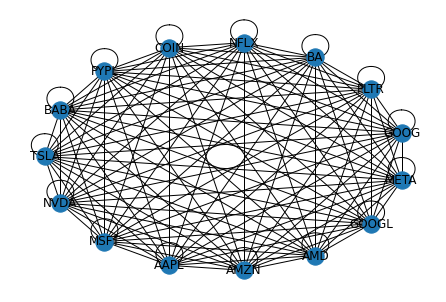

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.from_pandas_adjacency(adjacencyMatrix)
graph.name = "Stock Network"
nx.draw_shell(graph, with_labels=True)

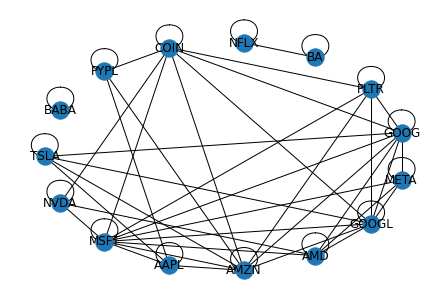

In [ ]:
import math
for edge in graph.edges:
  if math.isnan(graph.edges[edge[0], edge[1]]['weight']):
    graph.remove_edge(edge[0],edge[1])
nx.draw_shell(graph, with_labels=True)

# Next Steps:
1. Read "A Network Perspective..."
2. Current final result is Table with cross correlation.
3. Construct graph by setting opposite of correlation as distance between nodes